<a href="https://colab.research.google.com/github/Swapn2/deep_learning/blob/main/Batch_vs_stocjastic_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df[['Age','EstimatedSalary','Purchased']]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [10]:
x_train.shape

(320, 2)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(32,activation='relu',input_dim=2))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                96        
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=1,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
320/320 [==============================] - 2s 3ms/step - loss: 0.5072 - accuracy: 0.8531 - val_loss: 0.2755 - val_accuracy: 0.9375
Epoch 2/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3181 - accuracy: 0.8844 - val_loss: 0.2159 - val_accuracy: 0.9125
Epoch 3/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2752 - accuracy: 0.8906 - val_loss: 0.1839 - val_accuracy: 0.9375
Epoch 4/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2601 - accuracy: 0.9000 - val_loss: 0.1814 - val_accuracy: 0.9250
Epoch 5/10
320/320 [==============================] - 1s 4ms/step - loss: 0.2532 - accuracy: 0.9125 - val_loss: 0.1849 - val_accuracy: 0.9250
Epoch 6/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2485 - accuracy: 0.9156 - val_loss: 0.1885 - val_accuracy: 0.9375
Epoch 7/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2414 - accuracy: 0.9125 - val_loss: 0.1853 - val_accuracy: 0.9375
Epoch 

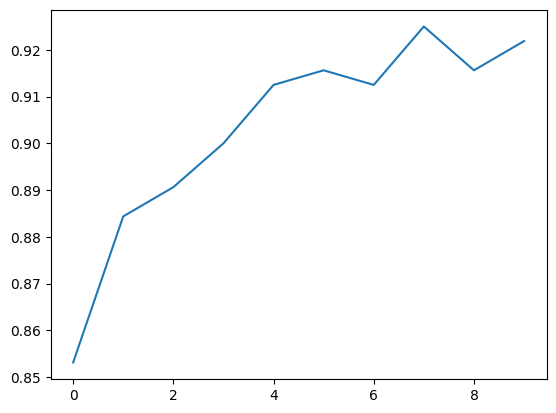

In [22]:
plt.plot(history.history['accuracy'])

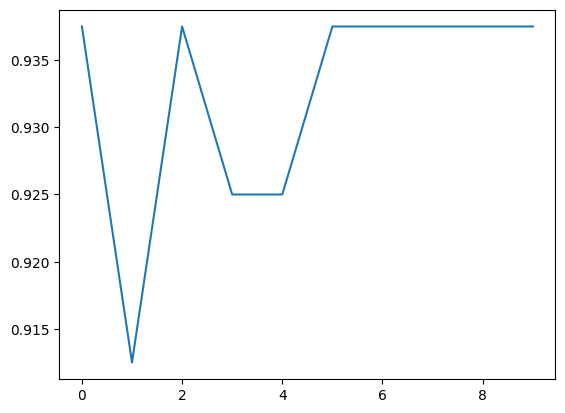

In [23]:
plt.plot(history.history['val_accuracy'])

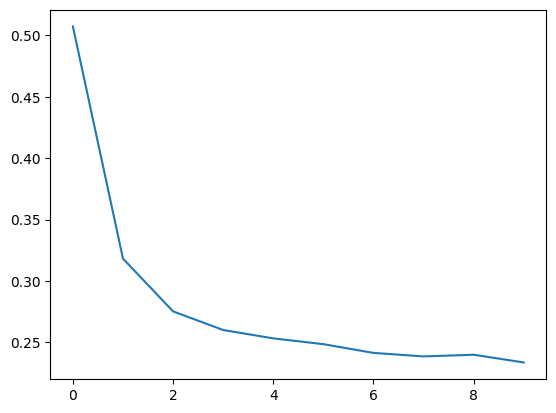

In [24]:
plt.plot(history.history['loss'])